In [2]:
from searchtweets import ResultStream, gen_rule_payload, load_credentials, collect_results
import csv
import pandas
import pandas as pd
import numpy as np
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob 
%matplotlib inline
import re
import time

In [ ]:
#setting up credentials

In [3]:
enterprise_search_args = load_credentials("~/.twitter_keys.yaml",
                                          yaml_key="search_tweets_api",
                                          env_overwrite=False)

Grabbing bearer token from OAUTH


In [5]:
#loading in top 100 data from csv -- mostly just to try loading from csv

In [4]:
data = pandas.read_csv("/Volumes/easystore/Thesis/top100_more.csv")

In [ ]:
#looking at data head

In [5]:
data.head()

nflId FirstName    LastName PositionAbbr  EntryYear  DraftRound  \
0    79860.0      John    Stafford           QB     2009.0         1.0   
1    79848.0   Malcolm     Jenkins           SS     2009.0         1.0   
2    79607.0    LeSean       McCoy           RB     2009.0         2.0   
3  2506106.0     Larry  Fitzgerald           WR     2004.0         1.0   
4  2506121.0    Philip      Rivers           QB     2004.0         1.0   

   DraftNumber Height  Weight               College  ... Rank  \
0          1.0  6'03"   220.0               Georgia  ...   31   
1         14.0  6'00"   204.0            Ohio State  ...   96   
2         53.0  5'11"   210.0            Pittsburgh  ...   30   
3          3.0  6'03"   218.0            Pittsburgh  ...   27   
4          4.0  6'05"   228.0  North Carolina State  ...   56   

              2017 team             2018 team Rank change Reference  \
0         Detroit Lions         Detroit Lions           0        31   
1   Philadelphia Eagles   Philadelphia Eagles           6        96   
2         Buffalo Bills         Buffalo Bills           3        30   
3     Arizona Cardinals     Arizona Cardinals          18        27   
4  Los Angeles Chargers  Los Angeles Chargers          17        56   

                                Year accomplishments   Race  \
0  31,947 passing yards, 2nd in NFL since 2011 (D...  white   
1  2nd Pro Bowl selection\nSuper Bowl champion (2...  black   
2  6th Pro Bowl selection, with 5th in a row\n30t...  black   
3  11th Pro Bowl selection\n2nd in Pro Bowl appea...  black   
4  7th Pro Bowl selection\n1 of 9 QB's in history...  white   

              Twitter                                            Picture  \
0                 NaN  https://www.google.com/url?sa=i&source=images&...   
1   "@MalcolmJenkins"  https://www.google.com/url?sa=i&source=images&...   
2      "@CutonDime25"  https://www.google.com/url?sa=i&source=images&...   
3  "@LarryFitzgerald"  https://www.google.com/url?sa=i&source=images&...   
4                 NaN  https://www.google.com/url?sa=i&source=images&...   

           fortwitter  
0       John Stafford  
1   "@MalcolmJenkins"  
2      "@CutonDime25"  
3  "@LarryFitzgerald"  
4       Philip Rivers  

[5 rows x 21 columns]

In [ ]:
#Bringing in correct data for this project

In [6]:
colnames = ['Player', 'Position', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'Team', 'Race', "Twitter"]
data = pandas.read_csv("/Volumes/easystore/Thesis/qbs.csv", names = colnames)

In [7]:
data.head()

Player Position   g1   g2   g3   g4   g5   g6 Team   Race  \
0  Russell Wilson       QB  Yes  Yes  Yes  Yes  Yes  Bye  SEA  Black   
1      Cam Newton       QB  Yes  Yes  Yes  Yes  Yes  Yes  CAR  Black   
2    Dak Prescott       QB  Yes  Yes  Yes  Yes  Yes  Bye  DAL  Black   
3  Jameis Winston       QB  Bye  Yes  Yes  Yes  Yes  Yes   TB  Black   
4      Alex Smith       QB  Yes  Yes  Yes  Yes  Yes  Yes   KC  White   

             Twitter  
0  @DangeRussWilson'  
1    @CameronNewton'  
2              @dak'  
3        @Jaboowins'  
4        Alex Smith'

In [13]:
#getting those who are on september 17-18 for loop

In [8]:
data1 = data[data.Player != 'Andy Dalton']

In [9]:
data1.head()

Player Position   g1   g2   g3   g4   g5   g6 Team   Race  \
0  Russell Wilson       QB  Yes  Yes  Yes  Yes  Yes  Bye  SEA  Black   
1      Cam Newton       QB  Yes  Yes  Yes  Yes  Yes  Yes  CAR  Black   
2    Dak Prescott       QB  Yes  Yes  Yes  Yes  Yes  Bye  DAL  Black   
3  Jameis Winston       QB  Bye  Yes  Yes  Yes  Yes  Yes   TB  Black   
4      Alex Smith       QB  Yes  Yes  Yes  Yes  Yes  Yes   KC  White   

             Twitter  
0  @DangeRussWilson'  
1    @CameronNewton'  
2              @dak'  
3        @Jaboowins'  
4        Alex Smith'

In [16]:
#getting those who are on september 14-15 for loop

In [17]:
data2 = data[data.Player == 'Andy Dalton']

In [18]:
data2.head()

Player Position   g1   g2   g3   g4   g5   g6 Team   Race  \
6  Andy Dalton       QB  Yes  Yes  Yes  Yes  Yes  Bye  CIN  White   

          Twitter  
6  @andydalton14'

In [19]:
#twitter handles for those on september 17-18

In [20]:
twitter1 = data1.Twitter.tolist()

newtwitter = []

for i in range(7):
    a = twitter1[i].replace("'", "")
    
    newtwitter.append(a)
    
    print(a)
    
print(newtwitter)
    

@DangeRussWilson
@CameronNewton
@dak
@Jaboowins
Alex Smith
@cj_wentz
@JoeFlacco
['@DangeRussWilson', '@CameronNewton', '@dak', '@Jaboowins', 'Alex Smith', '@cj_wentz', '@JoeFlacco']


In [21]:
#twitter handles for those on september 14-15

In [22]:
twitter2 = data2.Twitter.tolist()

newtwitter2 = []

for i in range(1):
    a = twitter2[i].replace("'", "")
    
    newtwitter2.append(a)
    
print(newtwitter2)

['@andydalton14']


In [ ]:
#Starting Twitter Search/Loop

In [23]:
for i in range(10):

    for handle in newtwitter:

        rule = gen_rule_payload(handle + "-is:retweet"),
                                from_date = "2017-09-17",
                                to_date = "2017-09-18",
                                results_per_call = 100)

        tweets = collect_results(rule, max_results=100, result_stream_args=enterprise_search_args)

        [print(tweet.all_text) for tweet in tweets[0:10]];


Keys to success from @DangeRussWilson. #SFvsSEA https://t.co/GktOjIix61
.@DangeRussWilson makes magic happen in the pocket... And @prichiejr hauls it in!

TOUCHDOWN, @SEAHAWKS! #Seahawks https://t.co/98uQF2FOsd
@NFL @DangeRussWilson @prichiejr @Seahawks Any chance for offensive holding??? Farcical call...
@bleedblue062 @DangeRussWilson I know :( not the hawks i feel in love with
@Dur_Sharru_kun @DangeRussWilson It would've been a long week in Seattle if they lost
.@DangeRussWilson makes magic happen in the pocket... And @prichiejr hauls it in!

TOUCHDOWN, @SEAHAWKS! #Seahawks https://t.co/98uQF2FOsd
.@DangeRussWilson makes magic happen in the pocket... And @prichiejr hauls it in!

TOUCHDOWN, @SEAHAWKS! #Seahawks https://t.co/98uQF2FOsd
Thank You Jesus!
.@DangeRussWilson makes magic happen in the pocket... And @prichiejr hauls it in!

TOUCHDOWN, @SEAHAWKS! #Seahawks https://t.co/98uQF2FOsd
.@DangeRussWilson makes magic happen in the pocket... And @prichiejr hauls it in!

TOUCHDOWN, @SEA

With that passing touchdown, @dak reached 25 career touchdowns with the fewest interceptions (4) in NFL history. https://t.co/23wKJVv6nD
@dak VOCE É MUTO RUIM
#DALvsDEN #Broncos take over and @dak  goes down! https://t.co/feYX3tsMdK
@NikkiG_MVP @dak is definetly showing his rookieness
@rob_tico81 @dak 🚫🏈🐮Its Not His Fault Man, Its Play Calling, Our Run Game, And Our Defense! Can't Put It All On Him! 🐮🏈🚫 https://t.co/ALmYfDftRW
THROW UP THE X! 
@dak to @DezBryant for the #DallasCowboys TD! #DALvsDEN https://t.co/CmGJLAkqpy
@dak looking like a rookie today, bad throws, indecisive and late with the ball. @EzekielElliott not your fault at all. O-Line terrible!
With that passing touchdown, @dak reached 25 career touchdowns with the fewest interceptions (4) in NFL history. https://t.co/23wKJVv6nD
@dak you overthrow the ball more than anyone I've ever seen, come on get the ball down, damn
@dak tf is you doing moe ?
The @TBBuccaneers @MikeEvans13_  and @Jaboowins are BALLIN' today. 🏀 #NFLCeleb

If more teams force Dallas to try to win passing GG, Dak a glorified Alex Smith
That's disrespectful to Alex Smith https://t.co/flRXBLeKKO
If more teams force Dallas to try to win passing GG, Dak a glorified Alex Smith
Alex Smith’s toughness on display, @stonecoldjones_ has the game of his life and 🔟 #PHIvsKC observations.

➡️ https://t.co/iRmI5NFK1A https://t.co/PvmHTpqv5e
Alex Smith’s toughness on display, @stonecoldjones_ has the game of his life and 🔟 #PHIvsKC observations.

➡️ https://t.co/iRmI5NFK1A https://t.co/PvmHTpqv5e
If more teams force Dallas to try to win passing GG, Dak a glorified Alex Smith
If more teams force Dallas to try to win passing GG, Dak a glorified Alex Smith
JuJu Smith-Schuster murdered Harrison Smith. https://t.co/SOkEiNOMNb
Alex Smith currently has 28,214 career passing yards. He needs 262 yards to pass former #Chiefs QB Trent Green, 28,475, for 54th all time. https://t.co/3dWgh3WkXv
When did Alex Smith start playing for the Cowboys? Geeez
Wentz a boneless

.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
@Ravens @JoeFlacco You mean....? https://t.co/n2TgubXbBE
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
@Ravens @JoeFlacco Ravens Nation!!!!!!
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
@White__Machismo @Ravens @JoeFlacco Hater
@White__Machismo @Ravens @JoeFlacco Once you become elite you STAY elite...
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
Keys to success from @DangeRussWilson. #SFvsSEA https://t.co/GktOjIix61
.@DangeRussWilson makes magic happen in the pocket... And @prichiejr hauls it in!

TOUCHDOWN, @SEAHAWKS! #Seahawks https://t.co/98uQF2FOsd
@NFL @DangeRussWilson @prichiejr @Seahawks Any chance for offensive holding??? Farcical call...
@bleedblue062 @DangeRussWilson I know :( not the hawks i feel in love with
@Dur_Sharru_kun @DangeRussWilson It would've been a long week 

retrying request; current status code: 429


Postgame with @CameronNewton 🎩 #KeepPounding https://t.co/bnBUZqLxcG
First @AaronRodgers12 said it, then @CameronNewton said it and now @tombrady12 has said it @TuckerCarlson. #NFLBoycott. https://t.co/iVvNc5GHf4
@CameronNewton don't be disappointed in yourself. You're the backbone of the team. #KeepPounding baby 🙌🏼💙
@DomZenga @br_kicks @BR_NFL @CameronNewton @UnderArmour Right
@NFL @CameronNewton @Panthers No worries. I got this. https://t.co/zFpea5KnAj
There goes @cameronnewton!

What. A. Run. #KeepPounding https://t.co/bhbWbccUlH
Those new @CameronNewton cleats are 🔥🔥🔥 https://t.co/at9A6xEP7n
Postgame with @CameronNewton 🎩 #KeepPounding https://t.co/bnBUZqLxcG
@glover3496 @NFL @CameronNewton @Panthers Not sure about the hat, but rate the shoes
Postgame with @CameronNewton 🎩 #KeepPounding https://t.co/bnBUZqLxcG


retrying request; current status code: 429
retrying request; current status code: 429
HTTP Error code: 429: Exceeded rate limit
Rule payload: {'query': '@dak', 'maxResults': 100, 'toDate': '201709180000', 'fromDate': '201709170000'}


HTTPError: 

In [ ]:
#creating pandas df

In [26]:
# We create a pandas dataframe as follows:
data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data.head(10))

Tweets
0  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...
1  RT @AttorneyGriggs: First @AaronRodgers12 said...
2  @CameronNewton don't be disappointed in yourse...
3  @DomZenga @br_kicks @BR_NFL @CameronNewton @Un...
4  @NFL @CameronNewton @Panthers No worries. I go...
5  RT @NFL: There goes @cameronnewton!\n\nWhat. A...
6  RT @Panthers: Those new @CameronNewton cleats ...
7  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...
8  @glover3496 @NFL @CameronNewton @Panthers Not ...
9  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...

In [30]:
print(dir(tweets[0]))

['__class__', '__contains__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_lazy_all_text', '_lazy_id', '_lazy_poll_options', '_lazy_quote_or_rt_text', '_lazy_text', '_lazy_tweet_type', '_lazy_user_entered_text', 'all_text', 'bio', 'clear', 'copy', 'created_at_datetime', 'created_at_seconds', 'created_at_string', 'embedded_tweet', 'favorite_count', 'follower_count', 'following_count', 'fromkeys', 'generator', 'geo_coordinates', 'get', 'gnip_matching_rules', 'hashtags', 'id', 'in_reply_to_screen_name', 'in_reply_to_status_id', 'in_reply_to_user_id', 'items', 'keys', 'klout_id', 'klout_influence_topics', 'klout_interest_topics', 'klout_pro

In [ ]:
#adding more columns

In [33]:
data['len']  = np.array([len(tweet.text) for tweet in tweets])
data['ID']   = np.array([tweet.id for tweet in tweets])
data['Date'] = np.array([tweet.created_at_datetime for tweet in tweets])
data['Likes']  = np.array([tweet.favorite_count for tweet in tweets])
data['RTs']    = np.array([tweet.retweet_count for tweet in tweets])
data['Quoted'] = np.array([tweet.quoted_tweet for tweet in tweets])
data['Q_or_RT'] = np.array([tweet.quote_or_rt_text for tweet in tweets])
data['User_ent_text'] = np.array([tweet.user_entered_text for tweet in tweets])

In [ ]:
#seeing the table

In [34]:
display(data.head(10))

Tweets  len                  ID  \
0  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...   77  909540626118692864   
1  RT @AttorneyGriggs: First @AaronRodgers12 said...  140  909540733404815360   
2  @CameronNewton don't be disappointed in yourse...  105  909540746079981570   
3  @DomZenga @br_kicks @BR_NFL @CameronNewton @Un...   61  909540750001606656   
4  @NFL @CameronNewton @Panthers No worries. I go...   77  909540774739460096   
5  RT @NFL: There goes @cameronnewton!\n\nWhat. A...   88  909540954939392000   
6  RT @Panthers: Those new @CameronNewton cleats ...   77  909541130408202240   
7  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...   77  909541206635532294   
8  @glover3496 @NFL @CameronNewton @Panthers Not ...   84  909541278366527490   
9  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...   77  909541597699854336   

                 Date  RTs Quoted  \
0 2017-09-17 22:12:38    0   None   
1 2017-09-17 22:13:03    0   None   
2 2017-09-17 22:13:06    0   None   
3 2017-09-17 22:13:07    0   None   
4 2017-09-17 22:13:13    0   None   
5 2017-09-17 22:13:56    0   None   
6 2017-09-17 22:14:38    0   None   
7 2017-09-17 22:14:56    0   None   
8 2017-09-17 22:15:13    0   None   
9 2017-09-17 22:16:30    0   None   

                                             Q_or_RT  \
0  Postgame with @CameronNewton 🎩 #KeepPounding h...   
1  First @AaronRodgers12 said it, then @CameronNe...   
2                                                      
3                                                      
4                                                      
5  There goes @cameronnewton!\n\nWhat. A. Run. #K...   
6  Those new @CameronNewton cleats are 🔥🔥🔥 https:...   
7  Postgame with @CameronNewton 🎩 #KeepPounding h...   
8                                                      
9  Postgame with @CameronNewton 🎩 #KeepPounding h...   

                                       User_ent_text  Likes  
0                                                         0  
1                                                         0  
2  @CameronNewton don't be disappointed in yourse...      0  
3  @DomZenga @br_kicks @BR_NFL @CameronNewton @Un...      0  
4  @NFL @CameronNewton @Panthers No worries. I go...      0  
5                                                         0  
6                                                         0  
7                                                         0  
8  @glover3496 @NFL @CameronNewton @Panthers Not ...      0  
9                                                         0

In [ ]:
#saving data to csv

In [41]:
data.to_csv("/Volumes/easystore/Thesis/tweets_try1.csv", index = False)

In [ ]:
#plotting time series of len of tweet

In [35]:
tlen = pd.Series(data=data['len'].values, index=data['Date'])

In [36]:
#tlen.plot(figsize=(16,4), color='r');

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
#trying a loop to get 1 thousand tweets from cam newton

In [ ]:
#can I search for only tweets that are created by the user (so there isn't so much overlap)?

In [10]:
data3 = data[data.Player == 'Cam Newton']

In [11]:
data3.head()

Player Position   g1   g2   g3   g4   g5   g6 Team   Race  \
1  Cam Newton       QB  Yes  Yes  Yes  Yes  Yes  Yes  CAR  Black   

           Twitter  
1  @CameronNewton'

In [ ]:
#getting rid of the quotations

In [12]:
twitter3 = data3.Twitter.tolist()

newtwitter3 = []

for i in range(1):
    a = twitter3[i].replace("'", "")
    
    newtwitter3.append(a)
    
print(newtwitter3)

['@CameronNewton']


In [ ]:
#running loop

In [14]:
all_tweets_cam = []

for i in range(10):

    for handle in newtwitter3:
        
        time.sleep(.1)

        rule = gen_rule_payload(handle,
                                from_date = "2017-09-17",
                                to_date = "2017-09-18",
                                results_per_call = 100)

        tweets2 = collect_results(rule, max_results=100, result_stream_args=enterprise_search_args)

        [print(tweet.all_text) for tweet in tweets2[0:10]];
        
        time.sleep(10)
        
    all_tweets_cam.extend(tweets2)
    

Postgame with @CameronNewton 🎩 #KeepPounding https://t.co/bnBUZqLxcG
First @AaronRodgers12 said it, then @CameronNewton said it and now @tombrady12 has said it @TuckerCarlson. #NFLBoycott. https://t.co/iVvNc5GHf4
@CameronNewton don't be disappointed in yourself. You're the backbone of the team. #KeepPounding baby 🙌🏼💙
@DomZenga @br_kicks @BR_NFL @CameronNewton @UnderArmour Right
@NFL @CameronNewton @Panthers No worries. I got this. https://t.co/zFpea5KnAj
There goes @cameronnewton!

What. A. Run. #KeepPounding https://t.co/bhbWbccUlH
Those new @CameronNewton cleats are 🔥🔥🔥 https://t.co/at9A6xEP7n
Postgame with @CameronNewton 🎩 #KeepPounding https://t.co/bnBUZqLxcG
@glover3496 @NFL @CameronNewton @Panthers Not sure about the hat, but rate the shoes
Postgame with @CameronNewton 🎩 #KeepPounding https://t.co/bnBUZqLxcG
Postgame with @CameronNewton 🎩 #KeepPounding https://t.co/bnBUZqLxcG
First @AaronRodgers12 said it, then @CameronNewton said it and now @tombrady12 has said it @TuckerCarlson

In [ ]:
#creating df

In [15]:
# We create a pandas dataframe as follows:
data_cam = pd.DataFrame(data=[tweet.text for tweet in all_tweets_cam], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data_cam.head(10))

Tweets
0  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...
1  RT @AttorneyGriggs: First @AaronRodgers12 said...
2  @CameronNewton don't be disappointed in yourse...
3  @DomZenga @br_kicks @BR_NFL @CameronNewton @Un...
4  @NFL @CameronNewton @Panthers No worries. I go...
5  RT @NFL: There goes @cameronnewton!\n\nWhat. A...
6  RT @Panthers: Those new @CameronNewton cleats ...
7  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...
8  @glover3496 @NFL @CameronNewton @Panthers Not ...
9  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...

In [ ]:
#adding more columns

In [16]:
data_cam['len']  = np.array([len(tweet.text) for tweet in all_tweets_cam])
data_cam['ID']   = np.array([tweet.id for tweet in all_tweets_cam])
data_cam['Date'] = np.array([tweet.created_at_datetime for tweet in all_tweets_cam])
data_cam['Likes']  = np.array([tweet.favorite_count for tweet in all_tweets_cam])
data_cam['RTs']    = np.array([tweet.retweet_count for tweet in all_tweets_cam])
data_cam['Quoted'] = np.array([tweet.quoted_tweet for tweet in all_tweets_cam])
data_cam['Q_or_RT'] = np.array([tweet.quote_or_rt_text for tweet in all_tweets_cam])
data_cam['User_ent_text'] = np.array([tweet.user_entered_text for tweet in all_tweets_cam])

In [ ]:
#seeing table

In [17]:
display(data_cam.head(10))

Tweets  len                  ID  \
0  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...   77  909540626118692864   
1  RT @AttorneyGriggs: First @AaronRodgers12 said...  140  909540733404815360   
2  @CameronNewton don't be disappointed in yourse...  105  909540746079981570   
3  @DomZenga @br_kicks @BR_NFL @CameronNewton @Un...   61  909540750001606656   
4  @NFL @CameronNewton @Panthers No worries. I go...   77  909540774739460096   
5  RT @NFL: There goes @cameronnewton!\n\nWhat. A...   88  909540954939392000   
6  RT @Panthers: Those new @CameronNewton cleats ...   77  909541130408202240   
7  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...   77  909541206635532294   
8  @glover3496 @NFL @CameronNewton @Panthers Not ...   84  909541278366527490   
9  RT @NFL: Postgame with @CameronNewton 🎩 #KeepP...   77  909541597699854336   

                 Date  Likes  RTs Quoted  \
0 2017-09-17 22:12:38      0    0   None   
1 2017-09-17 22:13:03      0    0   None   
2 2017-09-17 22:13:06      0    0   None   
3 2017-09-17 22:13:07      0    0   None   
4 2017-09-17 22:13:13      0    0   None   
5 2017-09-17 22:13:56      0    0   None   
6 2017-09-17 22:14:38      0    0   None   
7 2017-09-17 22:14:56      0    0   None   
8 2017-09-17 22:15:13      0    0   None   
9 2017-09-17 22:16:30      0    0   None   

                                             Q_or_RT  \
0  Postgame with @CameronNewton 🎩 #KeepPounding h...   
1  First @AaronRodgers12 said it, then @CameronNe...   
2                                                      
3                                                      
4                                                      
5  There goes @cameronnewton!\n\nWhat. A. Run. #K...   
6  Those new @CameronNewton cleats are 🔥🔥🔥 https:...   
7  Postgame with @CameronNewton 🎩 #KeepPounding h...   
8                                                      
9  Postgame with @CameronNewton 🎩 #KeepPounding h...   

                                       User_ent_text  
0                                                     
1                                                     
2  @CameronNewton don't be disappointed in yourse...  
3  @DomZenga @br_kicks @BR_NFL @CameronNewton @Un...  
4  @NFL @CameronNewton @Panthers No worries. I go...  
5                                                     
6                                                     
7                                                     
8  @glover3496 @NFL @CameronNewton @Panthers Not ...  
9

In [ ]:
#writing out csv

In [18]:
data_cam.to_csv("/Volumes/easystore/Thesis/tweets_cam.csv", index = False)

In [ ]:
#dropping duplicates to then do sentiment analysis

In [20]:
data_cam2 = data_cam.drop_duplicates(subset = 'Tweets')

In [ ]:
#how many rows

In [21]:
len(data_cam2.index)

59

In [22]:
len(data_cam.index)

1000

In [ ]:
#writing out csv of non-duplicated tweets

In [23]:
data_cam2.to_csv("/Volumes/easystore/Thesis/tweets_cam_nodup.csv", index = False)

In [ ]:
#sentiment analysis

In [45]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
#adding to df

In [46]:
data_cam2['SA'] = np.array([ analize_sentiment(tweet) for tweet in data_cam2['Tweets'] ])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#writing csv

In [47]:
data_cam2.to_csv("/Volumes/easystore/Thesis/tweets_cam_nodup_sent.csv", index = False)

In [ ]:
#trying a loop to get 1 thousand tweets from joe flacco

In [24]:
data4 = data[data.Player == 'Joe Flacco']

In [25]:
data4.head()

Player Position   g1   g2   g3   g4   g5   g6 Team   Race      Twitter
7  Joe Flacco       QB  Yes  Yes  Yes  Yes  Yes  Yes  BAL  White  @JoeFlacco'

In [ ]:
#getting rid of the quotations

In [26]:
twitter4 = data4.Twitter.tolist()

newtwitter4 = []

for i in range(1):
    a = twitter4[i].replace("'", "")
    
    newtwitter4.append(a)
    
print(newtwitter4)

['@JoeFlacco']


In [ ]:
#running loop

In [28]:
all_tweets_joe = []

for i in range(10):

    for handle in newtwitter4:
        
        time.sleep(.1)

        rule = gen_rule_payload(handle,
                                from_date = "2017-09-17",
                                to_date = "2017-09-18",
                                results_per_call = 100)

        tweets3 = collect_results(rule, max_results=100, result_stream_args=enterprise_search_args)

        [print(tweet.all_text) for tweet in tweets3[0:10]];
        
        time.sleep(10)
        
    all_tweets_joe.extend(tweets3)

.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
@Ravens @JoeFlacco You mean....? https://t.co/n2TgubXbBE
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
@Ravens @JoeFlacco Ravens Nation!!!!!!
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
@White__Machismo @Ravens @JoeFlacco Hater
@White__Machismo @Ravens @JoeFlacco Once you become elite you STAY elite...
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
@Ravens @JoeFlacco You mean....? https://t.co/n2TgubXbBE
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
@Ravens @JoeFlacco Ravens Nation!!!!!!
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
.@JoeFlacco warming up the arm 💪 https://t.co/IRvoONt4Fj
@White__Machismo @Ravens @JoeFlacco Hater
@White__Machismo @Rav

In [ ]:
#creating df

In [29]:
# We create a pandas dataframe as follows:
data_joe = pd.DataFrame(data=[tweet.text for tweet in all_tweets_joe], columns=['Tweets'])

# We display the first 10 elements of the dataframe:
display(data_joe.head(10))

Tweets
0  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...
1  RT @PurpleReignShow: @Ravens @JoeFlacco You me...
2  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...
3             @Ravens @JoeFlacco Ravens Nation!!!!!!
4  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...
5  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...
6  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...
7          @White__Machismo @Ravens @JoeFlacco Hater
8  @White__Machismo @Ravens @JoeFlacco Once you b...
9  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...

In [ ]:
#adding more columns

In [30]:
data_joe['len']  = np.array([len(tweet.text) for tweet in all_tweets_joe])
data_joe['ID']   = np.array([tweet.id for tweet in all_tweets_joe])
data_joe['Date'] = np.array([tweet.created_at_datetime for tweet in all_tweets_joe])
data_joe['Likes']  = np.array([tweet.favorite_count for tweet in all_tweets_joe])
data_joe['RTs']    = np.array([tweet.retweet_count for tweet in all_tweets_joe])
data_joe['Quoted'] = np.array([tweet.quoted_tweet for tweet in all_tweets_joe])
data_joe['Q_or_RT'] = np.array([tweet.quote_or_rt_text for tweet in all_tweets_joe])
data_joe['User_ent_text'] = np.array([tweet.user_entered_text for tweet in all_tweets_joe])

In [ ]:
#seeing table

In [31]:
display(data_joe.head(10))

Tweets  len                  ID  \
0  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...   68  909452754011267072   
1  RT @PurpleReignShow: @Ravens @JoeFlacco You me...   77  909452791592226817   
2  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...   68  909453167544246273   
3             @Ravens @JoeFlacco Ravens Nation!!!!!!   38  909453616821309441   
4  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...   68  909454034917933056   
5  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...   68  909454077054025730   
6  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...   68  909454406558650368   
7          @White__Machismo @Ravens @JoeFlacco Hater   41  909454429044170754   
8  @White__Machismo @Ravens @JoeFlacco Once you b...   75  909454554818797569   
9  RT @Ravens: .@JoeFlacco warming up the arm 💪 h...   68  909454563664592896   

                 Date  Likes  RTs Quoted  \
0 2017-09-17 16:23:28      0    0   None   
1 2017-09-17 16:23:36      0    0   None   
2 2017-09-17 16:25:06      0    0   None   
3 2017-09-17 16:26:53      0    0   None   
4 2017-09-17 16:28:33      0    0   None   
5 2017-09-17 16:28:43      0    0   None   
6 2017-09-17 16:30:02      0    0   None   
7 2017-09-17 16:30:07      0    0   None   
8 2017-09-17 16:30:37      0    0   None   
9 2017-09-17 16:30:39      0    0   None   

                                             Q_or_RT  \
0  .@JoeFlacco warming up the arm 💪 https://t.co/...   
1  @Ravens @JoeFlacco You mean....? https://t.co/...   
2  .@JoeFlacco warming up the arm 💪 https://t.co/...   
3                                                      
4  .@JoeFlacco warming up the arm 💪 https://t.co/...   
5  .@JoeFlacco warming up the arm 💪 https://t.co/...   
6  .@JoeFlacco warming up the arm 💪 https://t.co/...   
7                                                      
8                                                      
9  .@JoeFlacco warming up the arm 💪 https://t.co/...   

                                       User_ent_text  
0                                                     
1                                                     
2                                                     
3             @Ravens @JoeFlacco Ravens Nation!!!!!!  
4                                                     
5                                                     
6                                                     
7          @White__Machismo @Ravens @JoeFlacco Hater  
8  @White__Machismo @Ravens @JoeFlacco Once you b...  
9

In [ ]:
#writing out csv

In [32]:
data_joe.to_csv("/Volumes/easystore/Thesis/tweets_joe.csv", index = False)

In [ ]:
#dropping duplicates to then do sentiment analysis

In [33]:
data_joe2 = data_joe.drop_duplicates(subset = 'Tweets')

In [34]:
len(data_joe2.index)

67

In [35]:
len(data_joe.index)

1000

In [ ]:
#writing out csv of non-duplicated tweets

In [36]:
data_joe2.to_csv("/Volumes/easystore/Thesis/tweets_joe_nodup.csv", index = False)

In [ ]:
#time series of tweets

In [38]:
tlen = pd.Series(data=data_joe2['len'].values, index=data_joe2['Date'])

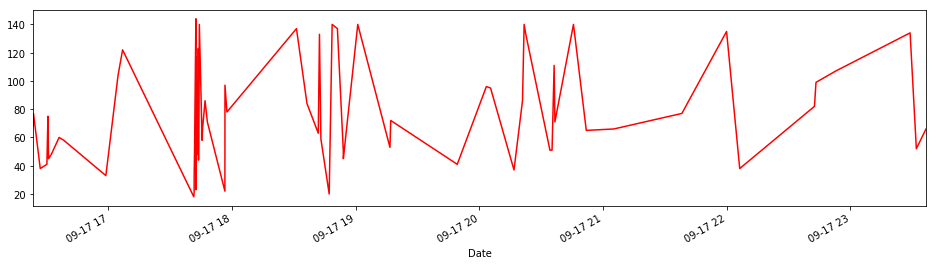

In [39]:
tlen.plot(figsize=(16,4), color='r');

In [ ]:
#sentiment analysis

In [40]:
def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [ ]:
#adding to df

In [41]:
data_joe2['SA'] = np.array([ analize_sentiment(tweet) for tweet in data_joe2['Tweets'] ])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
display(data_joe2.head(10))

Tweets  len  \
0   RT @Ravens: .@JoeFlacco warming up the arm 💪 h...   68   
1   RT @PurpleReignShow: @Ravens @JoeFlacco You me...   77   
3              @Ravens @JoeFlacco Ravens Nation!!!!!!   38   
7           @White__Machismo @Ravens @JoeFlacco Hater   41   
8   @White__Machismo @Ravens @JoeFlacco Once you b...   75   
10      @White__Machismo @Ravens @JoeFlacco #BeenWoke   45   
13   @MUTjacob @Ravens @JoeFlacco 20 bruh no question   48   
16  @White__Machismo @Ravens @JoeFlacco  https://t...   60   
22  @Ravens @JoeFlacco @JoeFlacco you the best man...   58   
32                  @Ravens @JoeFlacco Yeah Flacco! 🏈   33   

                    ID                Date  Likes  RTs Quoted  \
0   909452754011267072 2017-09-17 16:23:28      0    0   None   
1   909452791592226817 2017-09-17 16:23:36      0    0   None   
3   909453616821309441 2017-09-17 16:26:53      0    0   None   
7   909454429044170754 2017-09-17 16:30:07      0    0   None   
8   909454554818797569 2017-09-17 16:30:37      0    0   None   
10  909454625224376320 2017-09-17 16:30:54      0    0   None   
13  909454965630017536 2017-09-17 16:32:15      0    0   None   
16  909455918089170944 2017-09-17 16:36:02      0    0   None   
22  909456487155683329 2017-09-17 16:38:18      0    0   None   
32  909461631981309954 2017-09-17 16:58:44      0    0   None   

                                              Q_or_RT  \
0   .@JoeFlacco warming up the arm 💪 https://t.co/...   
1   @Ravens @JoeFlacco You mean....? https://t.co/...   
3                                                       
7                                                       
8                                                       
10                                                      
13                                                      
16                                                      
22                                                      
32                                                      

                                        User_ent_text  SA  
0                                                       0  
1                                                      -1  
3              @Ravens @JoeFlacco Ravens Nation!!!!!!   0  
7           @White__Machismo @Ravens @JoeFlacco Hater   0  
8   @White__Machismo @Ravens @JoeFlacco Once you b...   0  
10      @White__Machismo @Ravens @JoeFlacco #BeenWoke   0  
13   @MUTjacob @Ravens @JoeFlacco 20 bruh no question   0  
16  @White__Machismo @Ravens @JoeFlacco  https://t...   0  
22  @Ravens @JoeFlacco @JoeFlacco you the best man...   1  
32                  @Ravens @JoeFlacco Yeah Flacco! 🏈   0

In [ ]:
#writing csv

In [44]:
data_joe2.to_csv("/Volumes/easystore/Thesis/tweets_joe_nodup_sent.csv", index = False)